# Workflow for processing  Heron Island - 11JUN18 - Sentinel 2a

In [1]:
import time, os, sys
start_time = time.time()

from datetime import datetime, timedelta

import pandas as pd
import numpy as np
sys.path.append("..")

from CalVal import *

%matplotlib inline

field_data = ['HER', '11JUN18', '', 'Sentinel2a', 'GA_Panel', 'Radiance']
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/TMP/'
fignum=0

ls8_bad_days = ['2013-04-25', '2013-05-27', '2013-06-12', '2013-06-28', '2013-07-14',
                '2013-08-15', '2013-08-24', '2013-08-31', '2013-10-27', '2013-11-03', 
                '2013-11-12', '2013-11-28', '2013-12-05', '2013-12-14', '2013-12-21', '2014-01-06', 
                '2014-01-15', '2014-01-22', '2014-02-07', '2014-02-16', '2014-02-23', '2014-03-11', 
                '2014-03-20', '2014-03-27', '2014-04-12', '2014-04-28', '2014-05-07', '2014-05-14', 
                '2014-05-30', '2014-06-08', '2014-06-15', '2014-07-01', '2014-07-26', '2014-08-11', 
                '2014-08-27', '2014-10-05', '2014-11-06', '2014-11-22', '2014-12-01', '2014-12-17', 
                '2014-12-24', '2015-01-02', '2015-01-09', '2015-01-25', '2015-02-03', '2015-02-19', 
                '2015-02-26', '2015-03-14', '2015-03-30', '2015-04-15', '2015-05-01', '2015-06-11', 
                '2015-06-27', '2015-07-04', '2015-07-20', '2015-07-29', '2015-08-21', '2015-09-06', 
                '2015-10-01', '2015-10-17', '2015-10-24', '2015-11-02', '2015-11-09', '2015-11-25', 
                '2015-12-11', '2015-12-20', '2015-12-27', '2016-01-05', '2016-01-12', '2016-02-06', 
                '2016-02-13', '2016-02-22', '2016-02-29', '2016-03-09', '2016-03-16', '2016-03-25', 
                '2016-04-10', '2016-04-17', '2016-04-26', '2016-05-03', '2016-05-19', '2016-06-13', 
                '2016-06-20', '2016-06-29', '2016-07-15', '2016-07-31', '2016-08-07', '2016-08-16', 
                '2016-08-23', '2016-09-08', '2016-09-17', '2016-09-24', '2016-10-03', '2016-10-10', 
                '2016-10-26', '2016-11-11', '2016-11-20', '2016-11-27', '2016-12-13', '2016-12-22', 
                '2016-12-29', '2017-01-14', '2017-01-30', '2017-02-08', '2017-02-24', '2017-03-03', 
                '2017-03-19', '2017-03-28', '2017-04-04', '2017-04-29', '2017-05-06', '2017-05-22', 
                '2017-05-31', '2017-07-02', '2017-07-18', '2017-07-25', '2017-08-03', '2017-08-26', 
                '2017-09-27', '2017-10-13', '2017-10-22', '2017-10-29', '2017-11-07', '2017-11-14', 
                '2017-11-23', '2017-11-30', '2017-12-09', '2017-12-16', '2018-01-01', '2018-01-17', 
                '2018-01-26', '2018-02-02', '2018-02-27', '2018-03-06', '2018-03-15', '2018-03-22', 
                '2018-03-31', '2018-04-07', '2018-04-23', '2018-05-02', '2018-05-09', '2018-05-18', 
                '2018-05-25', '2018-06-03', '2018-06-10', '2018-06-26', '2018-08-06', '2018-08-29', 
                '2018-09-07']
s2a_bad_days = ['2015-10-23', '2015-11-12', '2016-01-11', '2016-02-10', '2016-02-20', '2016-03-21',
                '2016-04-10', '2016-04-30', '2016-05-10', '2016-05-20', '2016-06-19', '2016-07-29',
                '2016-08-08', '2016-09-07', '2016-11-16', '2016-11-26', '2016-12-06', '2016-12-26',
                '2017-01-05', '2017-01-15', '2017-02-04', '2017-02-24', '2017-03-06', '2017-03-16',
                '2017-03-26', '2017-04-05', '2017-04-15', '2017-04-25', '2017-05-05', '2017-05-15',
                '2017-06-04', '2017-06-14', '2017-07-04', '2017-07-14', '2017-10-02', '2017-10-22',
                '2017-11-01', '2017-11-21', '2017-12-01', '2017-12-11', '2018-01-10', '2018-01-20',
                '2018-01-30', '2018-02-09', '2018-03-11', '2018-03-21', '2018-03-31', '2018-04-10',
                '2018-04-20', '2018-05-10', '2018-05-20', '2018-05-30', '2018-06-09', '2018-06-29']
s2b_bad_days = ['2017-07-09', '2017-07-19', '2017-09-17', '2017-10-17', '2017-11-06', '2017-12-06',
                '2017-12-16', '2018-01-05', '2018-01-15', '2018-01-25', '2018-02-04', '2018-02-24',
                '2018-03-16', '2018-03-26', '2018-04-05', '2018-04-25', '2018-05-05', '2018-05-25',
                '2018-06-04', '2018-06-14']
ls8_csvs = ['HER_11JUN18__Landsat8.csv']
sent_csvs = ['HER_11JUN18__Sentinel2a.csv']
rain_dat = '../Weather/GLA.csv'

brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 1.0, 0.0, 0.0],
                          ['band11', 1.0, 0.0, 0.0],
                          ['band12', 1.0, 0.0, 0.0],
                          ['band2', 1.0, 0.0, 0.0],
                          ['band3', 1.0, 0.0, 0.0],
                          ['band4', 1.0, 0.0, 0.0],
                          ['band5', 1.0, 0.0, 0.0],
                          ['band6', 1.0, 0.0, 0.0],
                          ['band7', 1.0, 0.0, 0.0],
                          ['band8', 1.0, 0.0, 0.0],
                          ['band8a', 1.0, 0.0, 0.0],
                         ])
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})



In [2]:
ed = pd.read_csv('../HP1.csv')
ed.set_index('Time', inplace=True)
ed.index.names = ['Wavelength']
ed.drop('576.23333', axis=1, inplace=True)
ed.drop('579.71667', axis=1, inplace=True)

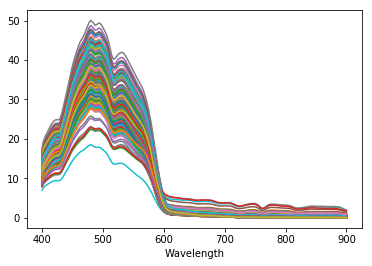

In [3]:
ed.plot(legend=False)

In [4]:
edtot = pd.read_csv('../HP2.csv')
edtot.set_index('Time', inplace=True)
edtot.index.names = ['Wavelength']

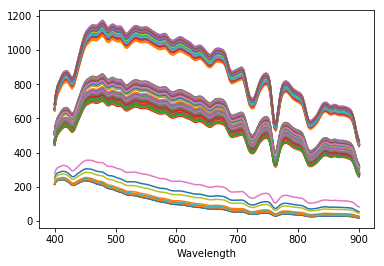

In [5]:
edtot.plot(legend=False)

In [6]:
lu = pd.read_csv('../HP3.csv')

In [7]:
lu.set_index('Time', inplace=True)

In [8]:
lu.index.names = ['Wavelength']

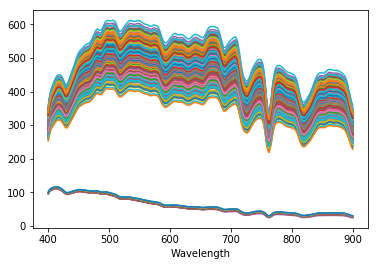

In [9]:
lu.plot(legend=False)

In [10]:
res_ed = [int(60*x) for x in ed.columns.values.astype(float)]
res_edtot = [int(60*x) for x in edtot.columns.values.astype(float)]
res_lu = [int(60*x) for x in lu.columns.values.astype(float)]

In [11]:
res12 = [a_i - b_i for a_i, b_i in zip(res_ed, res_edtot)]
res13 = [a_i - b_i for a_i, b_i in zip(res_ed, res_lu)]
res23 = [a_i - b_i for a_i, b_i in zip(res_edtot, res_lu)]


In [12]:
edtot.columns = res_edtot

In [13]:
lu.columns = res_lu

In [14]:
ed.columns = res_ed

In [15]:
edtotplus = edtot.copy()
edtotplus.columns = edtot.columns.values+1
edtotminus = edtot.copy()
edtotminus.columns = edtot.columns.values-1

edplus = ed.copy()
edplus.columns = ed.columns.values+1
edminus = ed.copy()
edminus.columns = ed.columns.values-1

### Use this cell for lu/edtot

plop = pd.DataFrame()
for i in lu.columns.values:
    try:
        plop = pd.concat([plop, lu[i]/edtot[i]], axis=1)
    except KeyError:
        try:
            plop = pd.concat([plop, lu[i]/edtotplus[i]], axis=1)
        except KeyError:
            try:
                plop = pd.concat([plop, lu[i]/edtotminus[i]], axis=1)
            except KeyError:
                continue
            continue
        continue
        
badcols = []

for i in range(len(plop.iloc[0])):
    if plop.iloc[0,i]<0.3:
        badcols.append(i)
        
plop.drop(plop.columns[badcols], axis=1, inplace=True)

badcols = []

for i in range(len(plop.iloc[0])):
    if plop.iloc[0,i]>1.0:
        badcols.append(i)
        
plop.drop(plop.columns[badcols], axis=1, inplace=True)

In [16]:
### Use this cell for ed/lu

plop = pd.DataFrame()
for i in lu.columns.values:
    try:
        plop = pd.concat([plop, ed[i]/lu[i]], axis=1)
    except KeyError:
        try:
            plop = pd.concat([plop, edplus[i]/lu[i]], axis=1)
        except KeyError:
            try:
                plop = pd.concat([plop, edminus[i]/lu[i]], axis=1)
            except KeyError:
                continue
            continue
        continue
        
badcols = []

for i in range(len(plop.iloc[0])):
    if plop.iloc[0,i]>0.08:
        badcols.append(i)
        
plop.drop(plop.columns[badcols], axis=1, inplace=True)

In [17]:
for i in range(901, 2501):
    plop.loc[i] = plop.loc[900]
for i in range(350, 399):
    plop.loc[i] = plop.loc[400]

In [18]:
median = plop.median(axis=1)

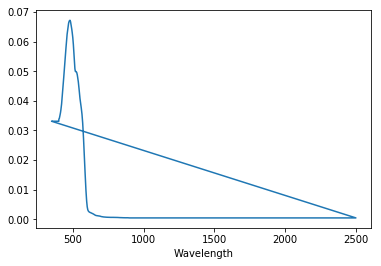

In [19]:
median.plot()

In [20]:
f_name = sat_resp['Landsat8']
result_ls8_df, band = ApplyWeights.apply_weights(f_name, plop)
f_name = sat_resp['Sentinel2a']
result_s2a_df, band = ApplyWeights.apply_weights(f_name, plop)
f_name = sat_resp['Sentinel2b']
result_s2b_df, band = ApplyWeights.apply_weights(f_name, plop)

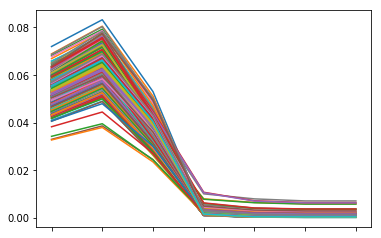

In [21]:
result_ls8_df.T.plot(legend=False)

In [22]:
result_ls8_df['Latitude'] = -23.435776 
result_ls8_df['Longitude'] = 151.998163
result_ls8_df['Line'] = 1
result_ls8_df['date_saved'] = datetime(2018, 6, 11, 23, 45, 34)

result_s2a_df['Latitude'] = -23.435776 
result_s2a_df['Longitude'] = 151.998163
result_s2a_df['Line'] = 1
result_s2a_df['date_saved'] = datetime(2018, 6, 11, 23, 45, 34)

result_s2b_df['Latitude'] = -23.435776 
result_s2b_df['Longitude'] = 151.998163
result_s2b_df['Line'] = 1
result_s2b_df['date_saved'] = datetime(2018, 6, 11, 23, 45, 34)


In [23]:
gps_data = pd.read_csv('../ff2.txt')
gps_data.set_index('time', inplace=True)

for i in range(len(plop.columns.values)-1):
    for j in range(len(gps_data.index)):
        if plop.columns.values[i] <= gps_data.index[j]:
#            print("Changing result_df lat/lon from", result_df['Latitude'][i], result_df['Longitude'][i], " to ",
#                  gps_data.latitude.iloc[j], gps_data.longitude.iloc[j])
            result_ls8_df['Latitude'][i] = gps_data.latitude.iloc[j]
            result_ls8_df['Longitude'][i] = gps_data.longitude.iloc[j]
            result_s2a_df['Latitude'][i] = gps_data.latitude.iloc[j]
            result_s2a_df['Longitude'][i] = gps_data.longitude.iloc[j]
            result_s2b_df['Latitude'][i] = gps_data.latitude.iloc[j]
            result_s2b_df['Longitude'][i] = gps_data.longitude.iloc[j]
            break
    if plop.columns.values[i] > gps_data.index[-1]:
#        print("Changing result_df lat/lon from", result_df['Latitude'][i], result_df['Longitude'][i], " to ",
#               gps_data.latitude.iloc[j], gps_data.longitude.iloc[j])
        result_ls8_df['Latitude'][i] = gps_data.latitude.iloc[-1]
        result_ls8_df['Longitude'][i] = gps_data.longitude.iloc[-1]
        result_s2a_df['Latitude'][i] = gps_data.latitude.iloc[-1]
        result_s2a_df['Longitude'][i] = gps_data.longitude.iloc[-1]
        result_s2b_df['Latitude'][i] = gps_data.latitude.iloc[-1]
        result_s2b_df['Longitude'][i] = gps_data.longitude.iloc[-1]

/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [24]:
from CalVal.SolarAngle import solang
result_ls8_df['Solar_angle'] = 56.285354#result_ls8_df.apply(solang, axis=1)
result_s2a_df['Solar_angle'] = 56.285354#result_s2a_df.apply(solang, axis=1)
result_s2b_df['Solar_angle'] = 56.285354#result_s2b_df.apply(solang, axis=1)


In [25]:
ground_brdf_ls8, hb, br = BRDF.ReadAndCalc(brdf_data, result_ls8_df, ['','','','Landsat8'])
ground_brdf_s2a, hb, br = BRDF.ReadAndCalc(brdf_data, result_s2a_df, ['','','','Sentinel2a'])
ground_brdf_s2b, hb, br = BRDF.ReadAndCalc(brdf_data, result_s2b_df, ['','','','Sentinel2b'])

### Choose bands for Landsat 8 and Sentinel satellite data

In [26]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [27]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ground_brdf_ls8)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

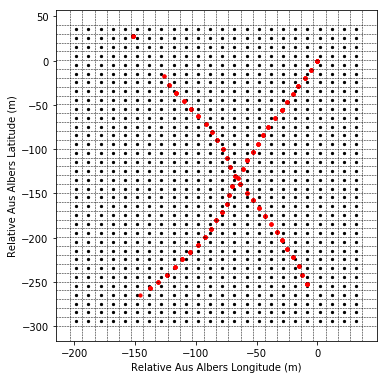

In [28]:
xloc = FIG_SatFieldLocations.FIG_sat_field_locations(ground_brdf_ls8, s2a_array, colpac, output, field_data, fignum)
fignum +=1

### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [29]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ground_brdf_ls8, ground_brdf_s2a, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

In [30]:
import importlib
importlib.reload(FIG_ManyBigRGB)

<module 'CalVal.FIG_ManyBigRGB' from '../CalVal/FIG_ManyBigRGB.py'>

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

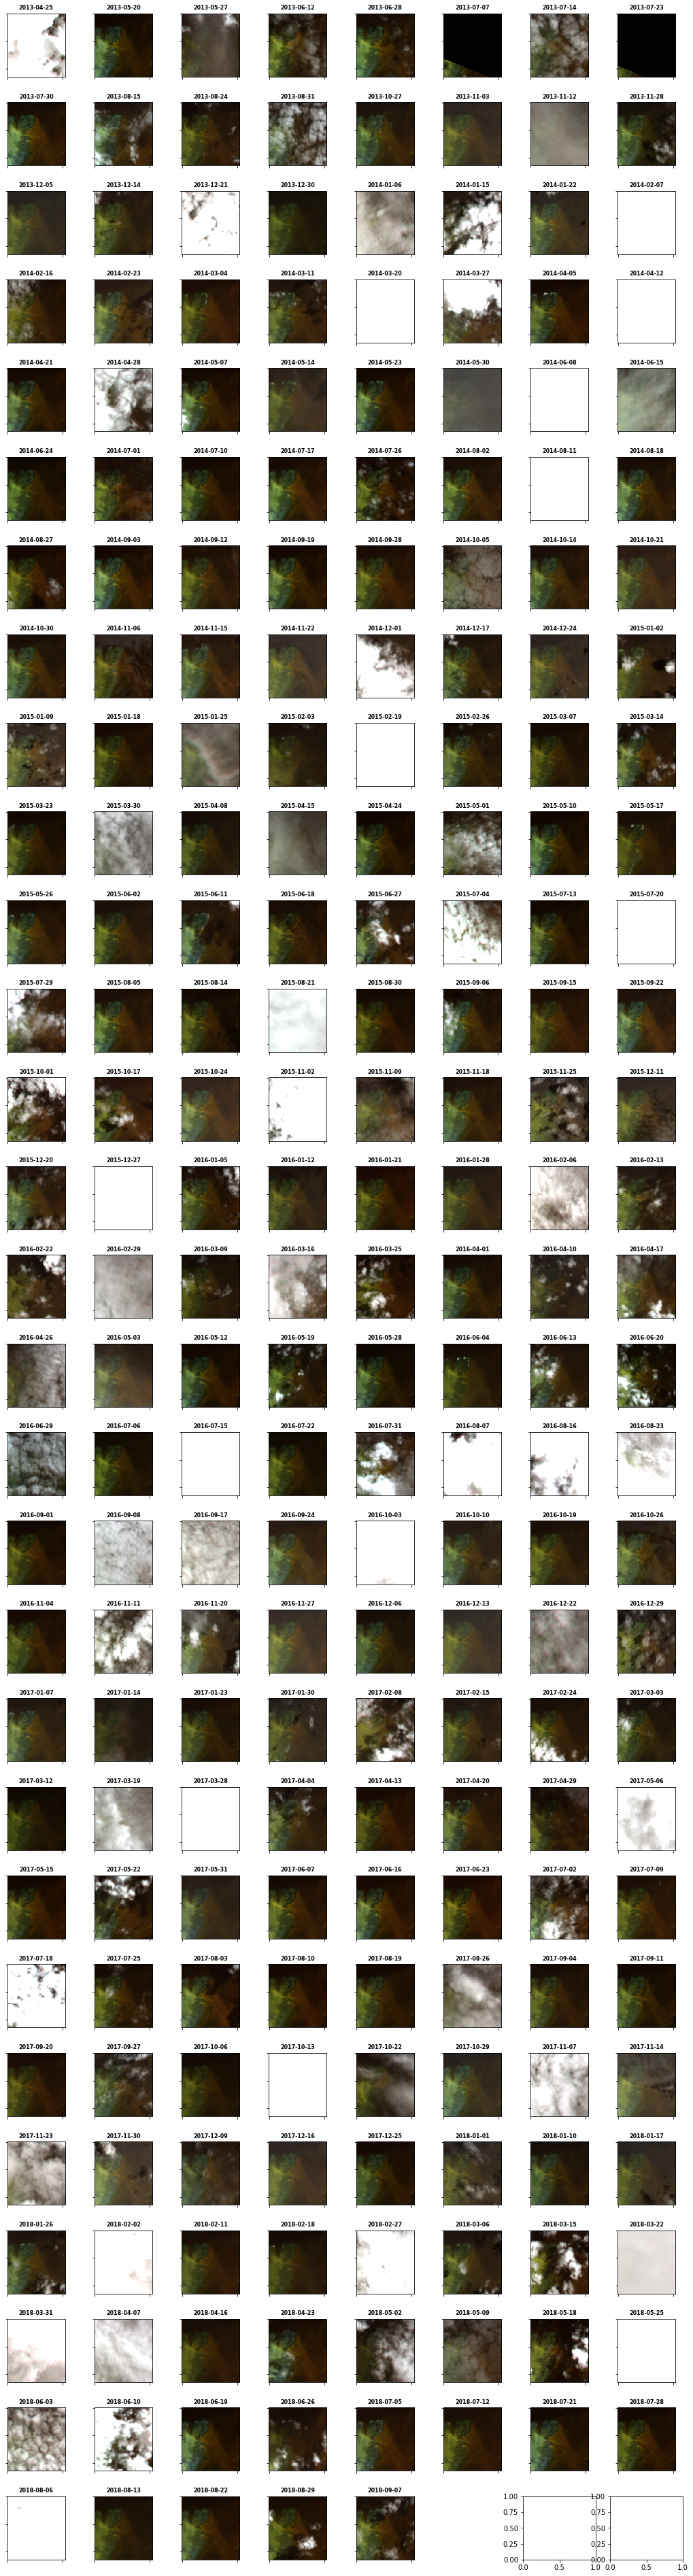

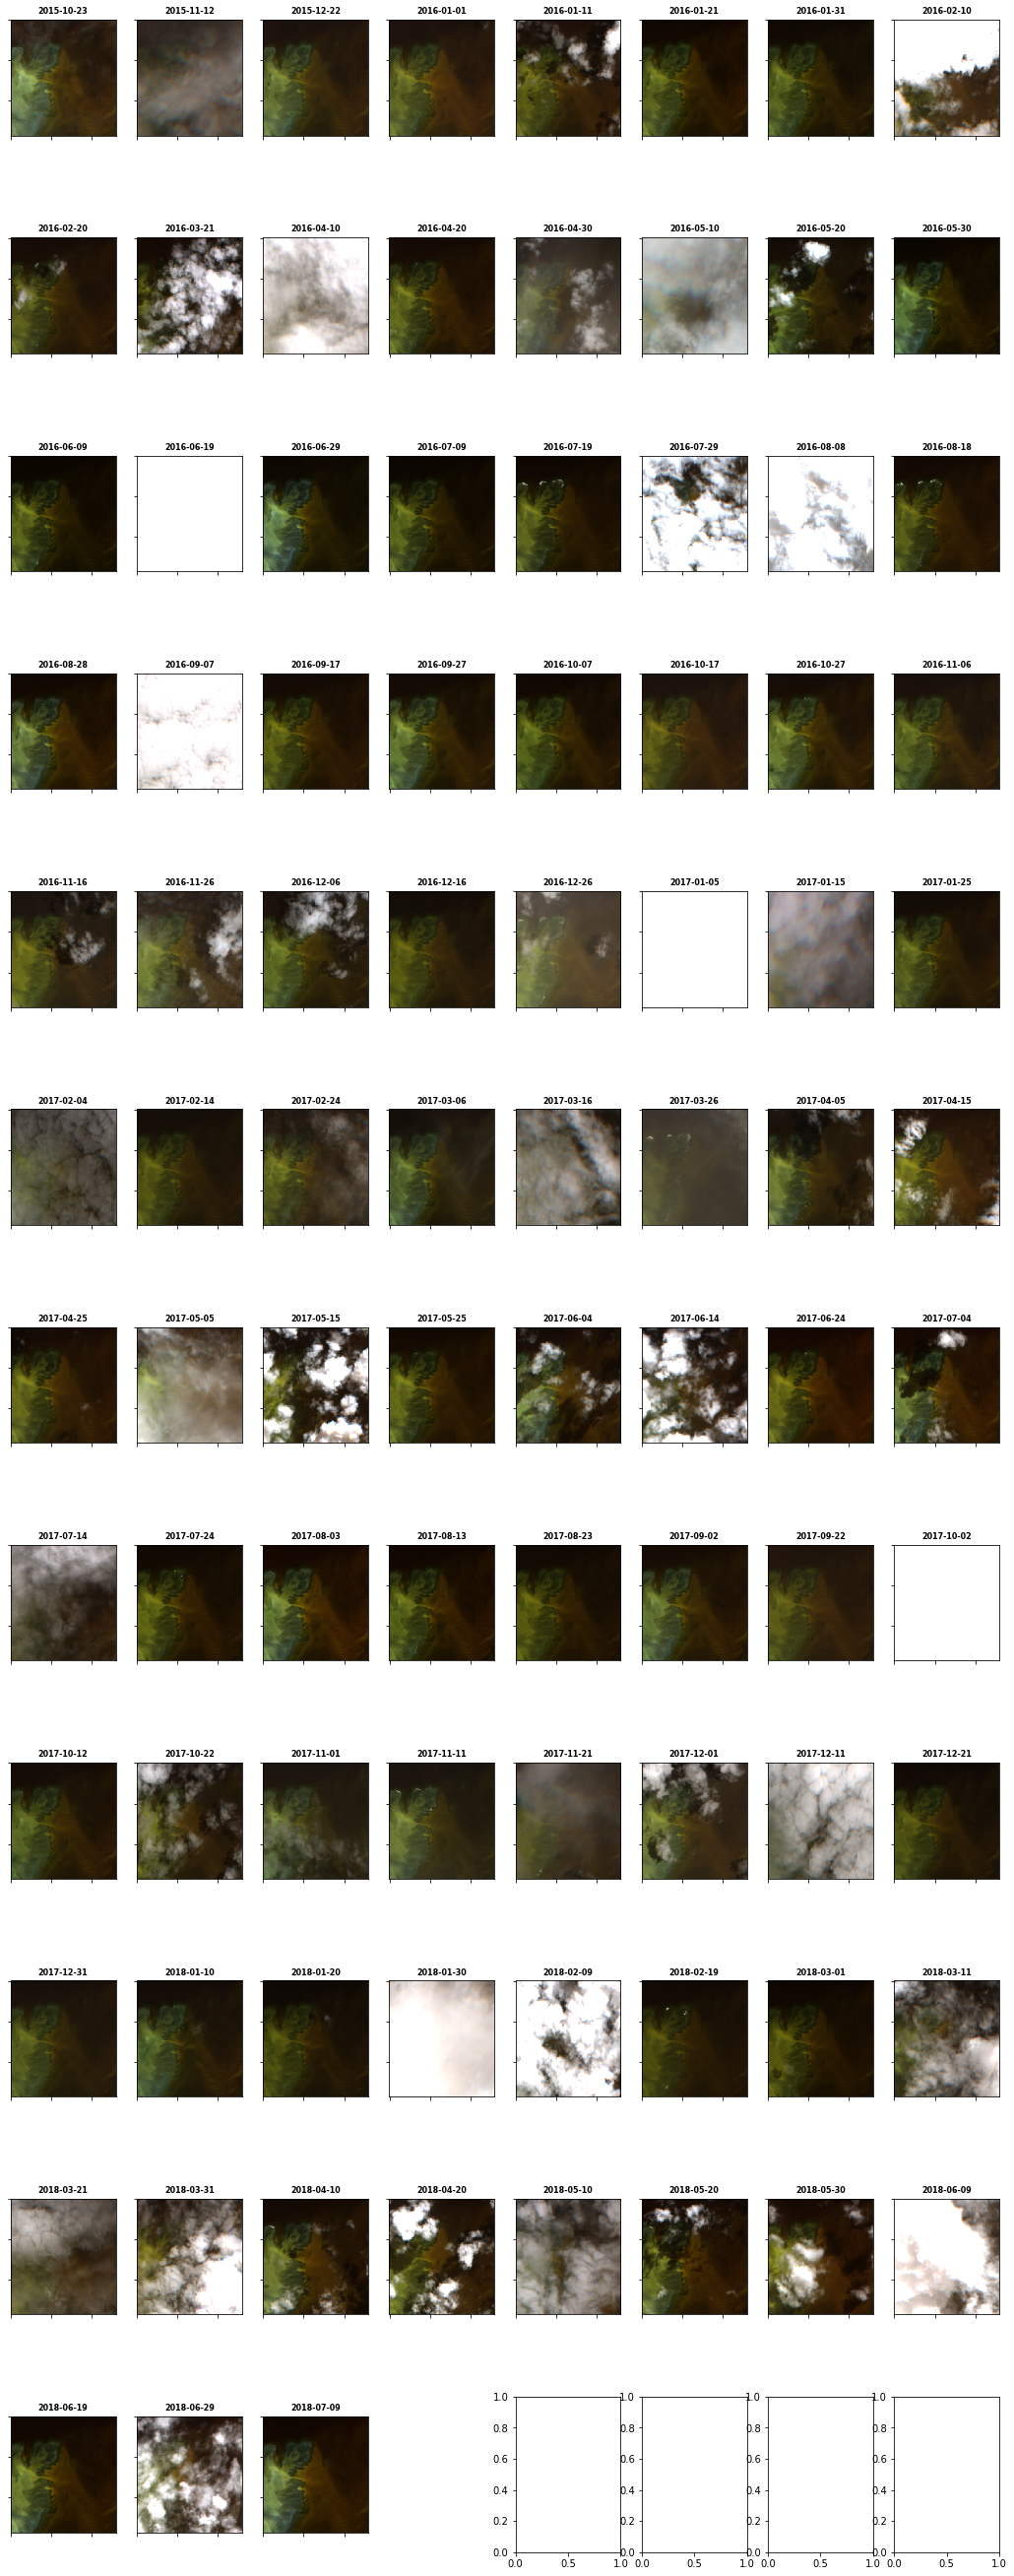

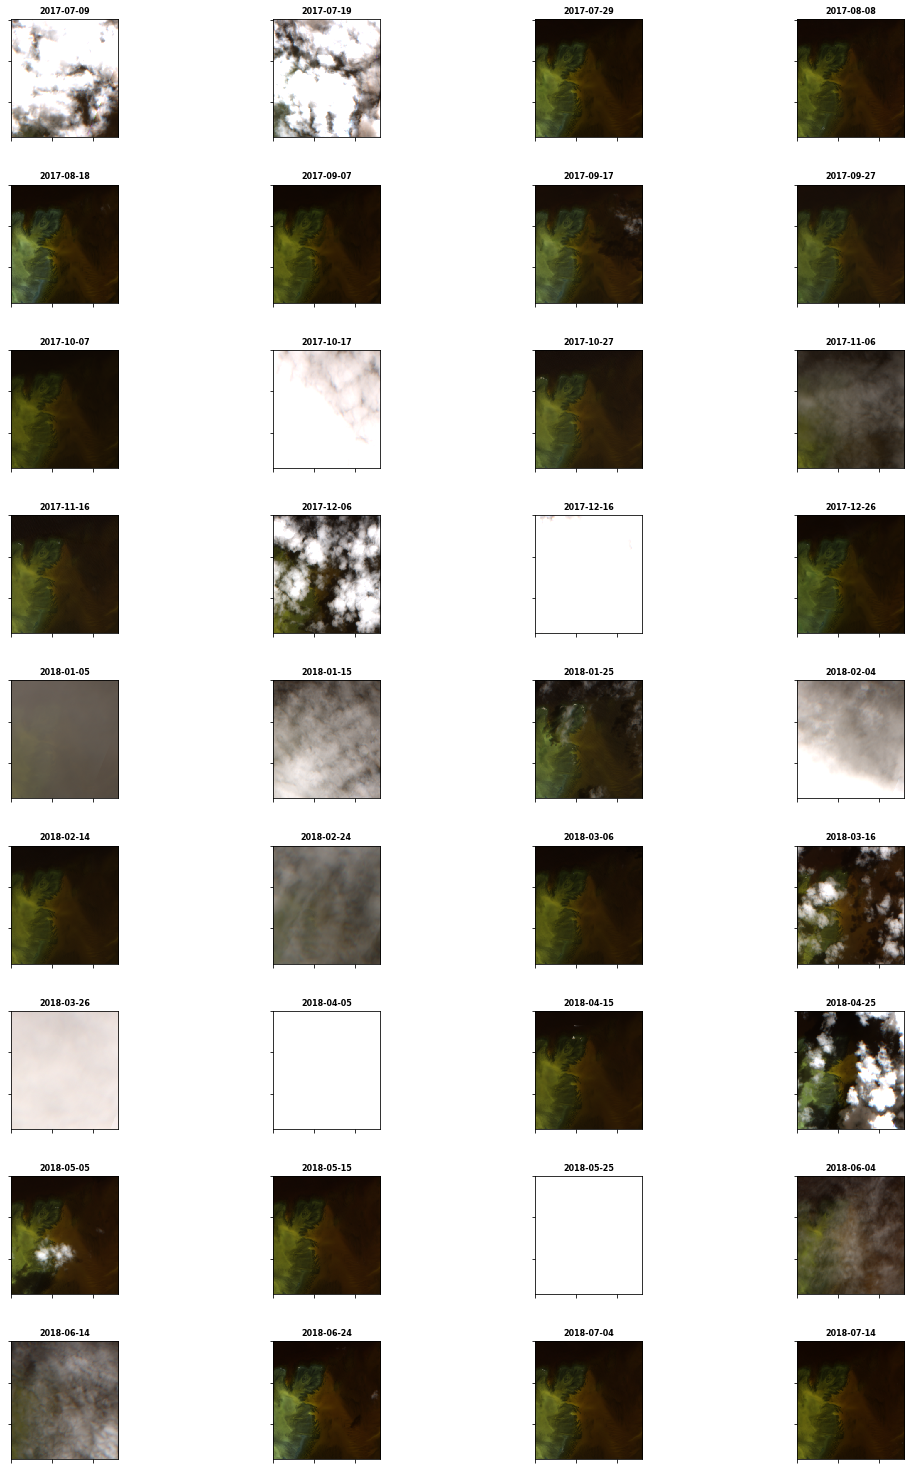

In [31]:
FIG_ManyBigRGB.FIG_many_bigRGB(ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Satellite data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

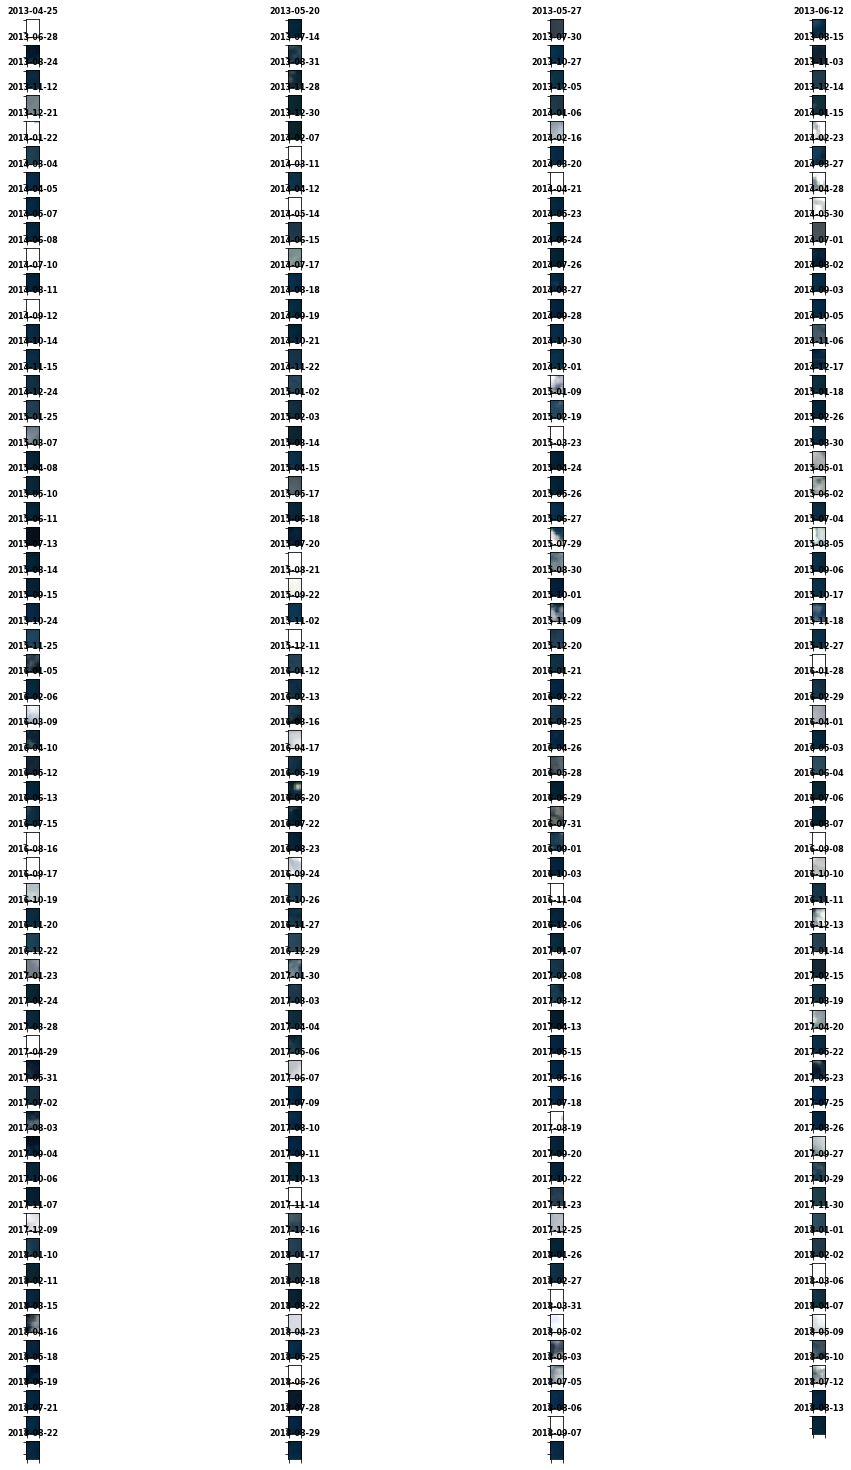

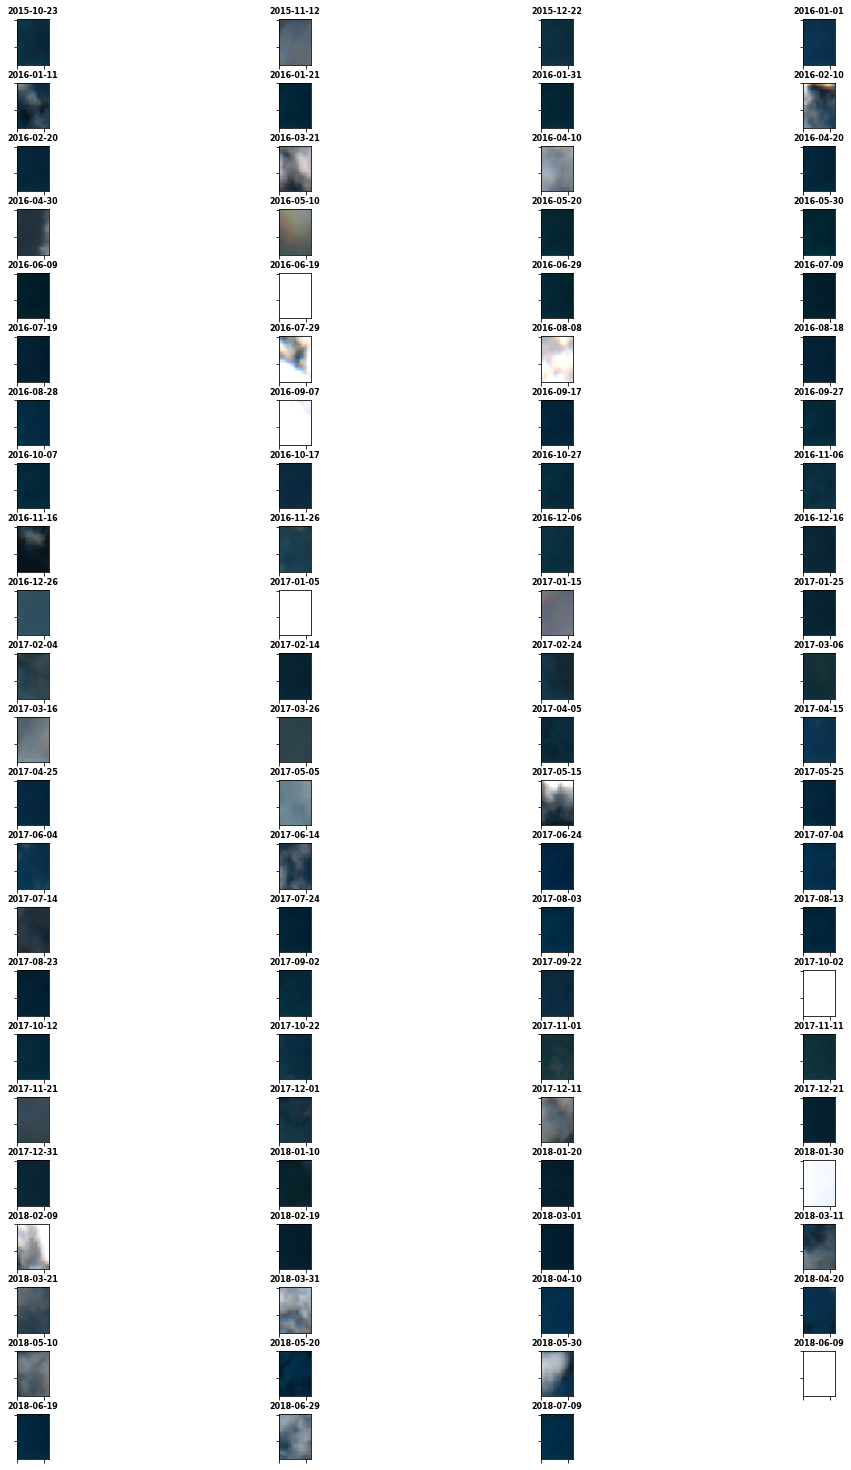

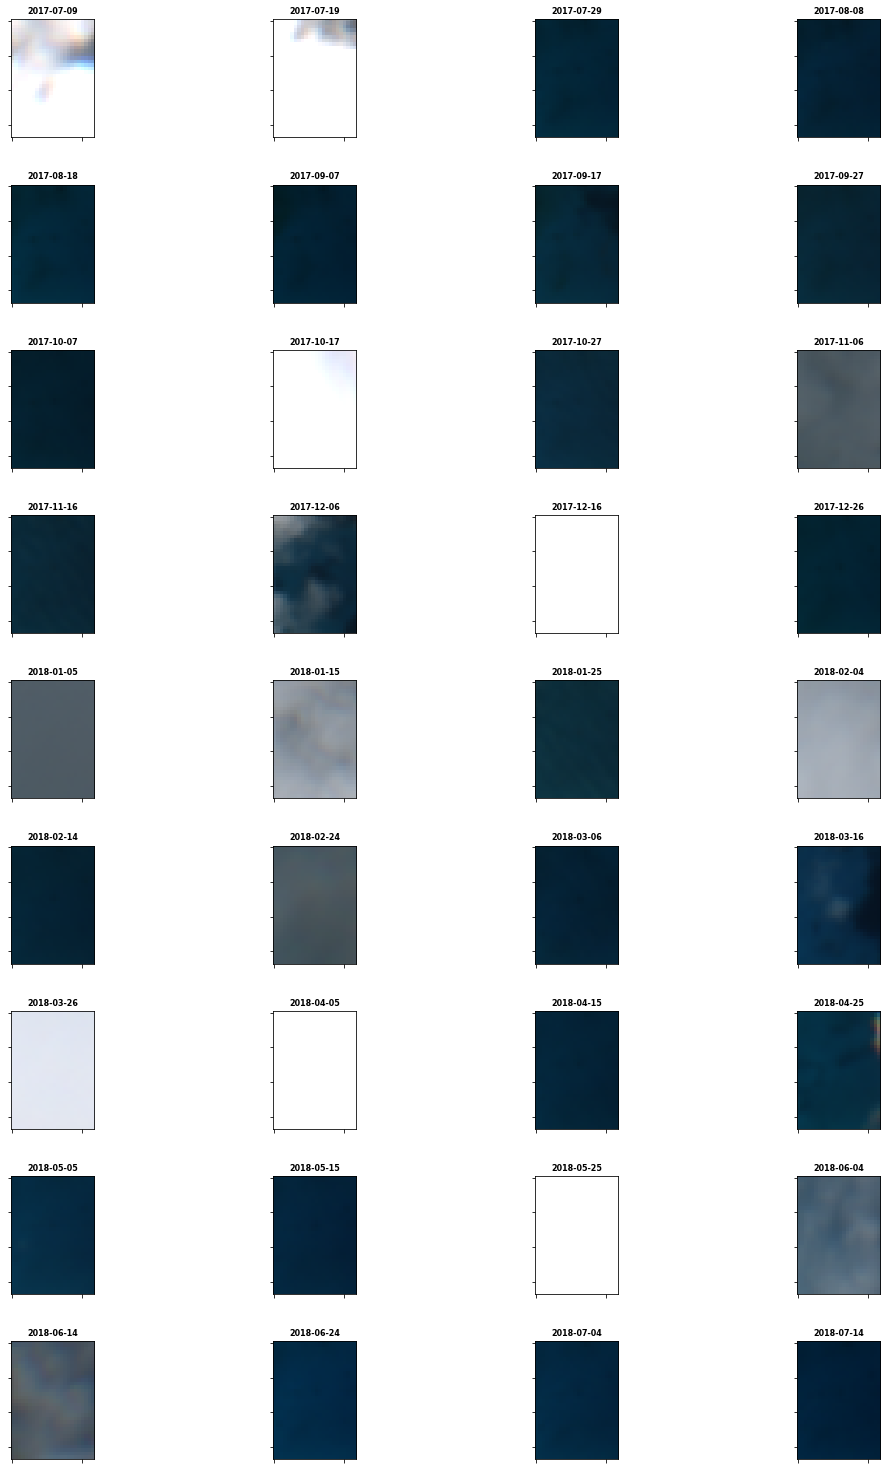

In [32]:
FIG_ManyRGB.FIG_many_RGB(ls8_array, s2a_array, s2b_array, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


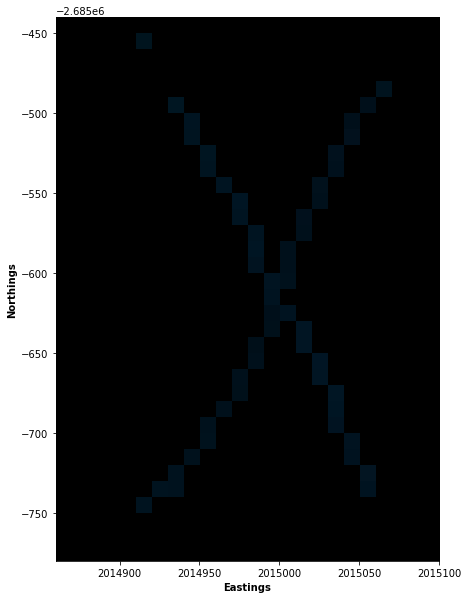

In [33]:
FIG_FieldRGB.FIG_field_RGB(field_array_s2a, output, field_data, fignum)
fignum += 1

# Figure

### Plot ratio arrays for each band

Each panel shows the ratio of satellite/field data.

In [34]:
#FIG_RatioArrays.FIG_ratio_arrays(sat_array, field_array, output, field_data, fignum)
#fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [35]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

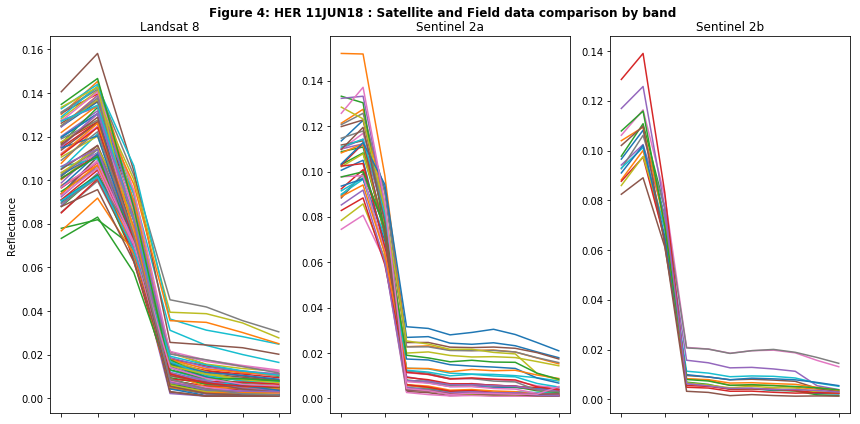

In [36]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

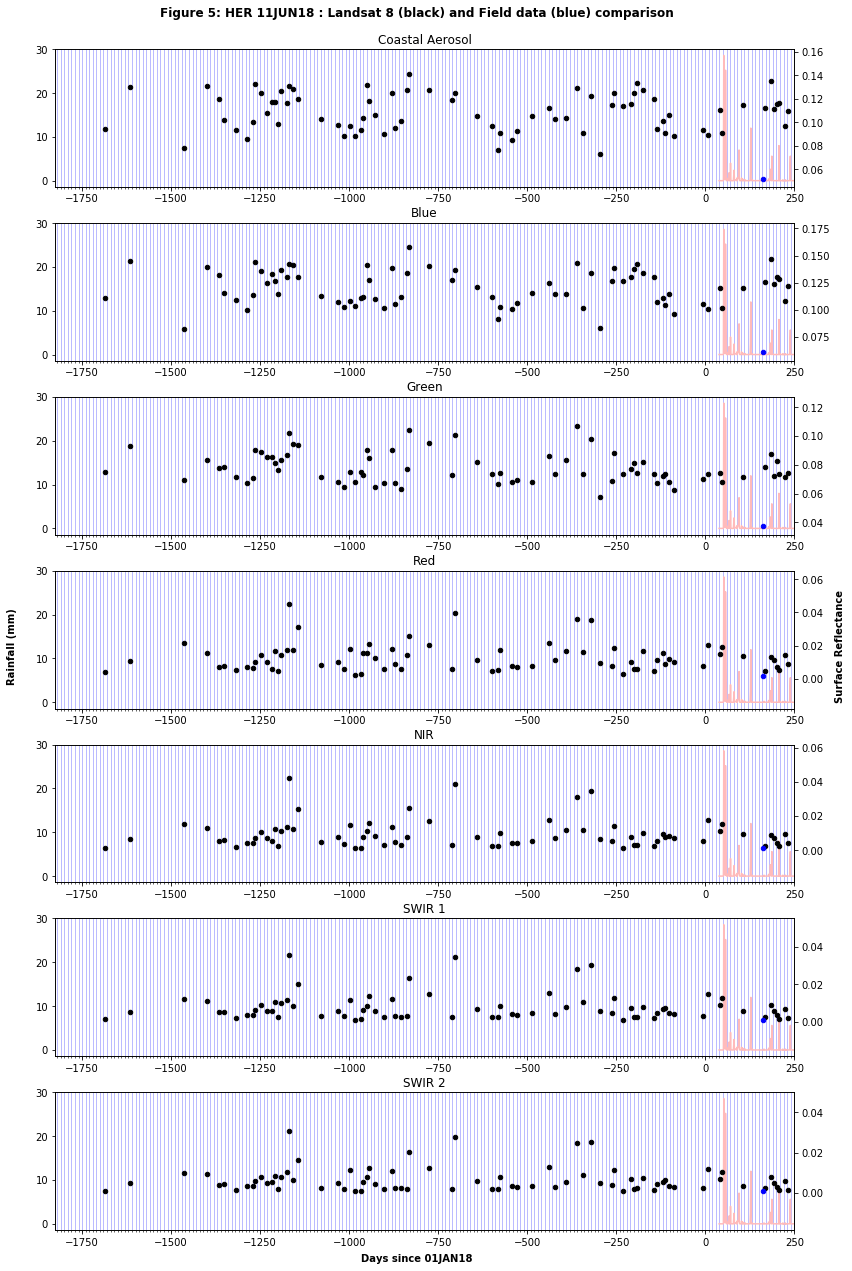

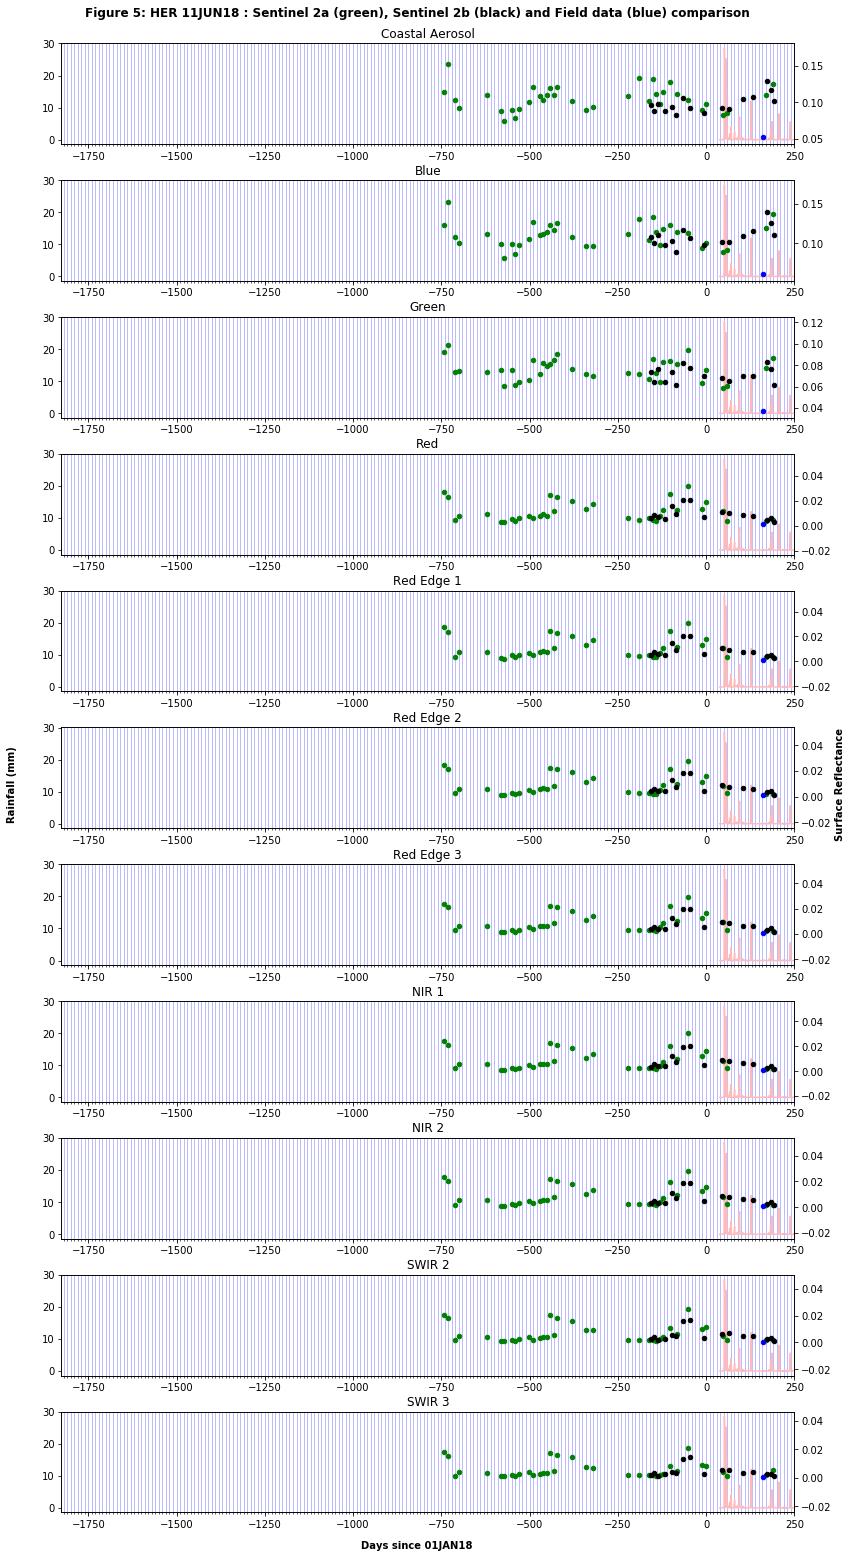

In [37]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [38]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df, rain_dat)

LANDSAT 8: Number of adjacent overpasses: 78
Landsat 8 Surface Reflectance for Band 1 is 0.11+/-0.016 (14.95%)
Landsat 8 Surface Reflectance for Band 2 is 0.122+/-0.016 (13.08%)
Landsat 8 Surface Reflectance for Band 3 is 0.078+/-0.012 (15.18%)
Landsat 8 Surface Reflectance for Band 4 is 0.012+/-0.011 (91.97%)
Landsat 8 Surface Reflectance for Band 5 is 0.008+/-0.01 (128.7%)
Landsat 8 Surface Reflectance for Band 6 is 0.007+/-0.01 (141.11%)
Landsat 8 Surface Reflectance for Band 7 is 0.006+/-0.008 (140.26%)

SENTINEL 2a: Number of adjacent overpasses: 37
Sentinel 2a Surface Reflectance for Band 1 is 0.102+/-0.017 (16.35%)
Sentinel 2a Surface Reflectance for Band 2 is 0.107+/-0.016 (14.59%)
Sentinel 2a Surface Reflectance for Band 3 is 0.074+/-0.011 (14.76%)
Sentinel 2a Surface Reflectance for Band 4 is 0.009+/-0.007 (72.67%)
Sentinel 2a Surface Reflectance for Band 5 is 0.009+/-0.007 (78.88%)
Sentinel 2a Surface Reflectance for Band 6 is 0.007+/-0.007 (93.98%)
Sentinel 2a Surface Refle

In [39]:
dd0_ls8.to_csv('../CSV/TimeStats/HER_ls8_wetSR.csv')
dd1_ls8.to_csv('../CSV/TimeStats/HER_ls8_wetDiff.csv')
dd0_s2a.to_csv('../CSV/TimeStats/HER_s2a_wetSR.csv')
dd1_s2a.to_csv('../CSV/TimeStats/HER_s2a_wetDiff.csv')
dd0_s2b.to_csv('../CSV/TimeStats/HER_s2b_wetSR.csv')
dd1_s2b.to_csv('../CSV/TimeStats/HER_s2b_wetDiff.csv')


In [40]:
MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

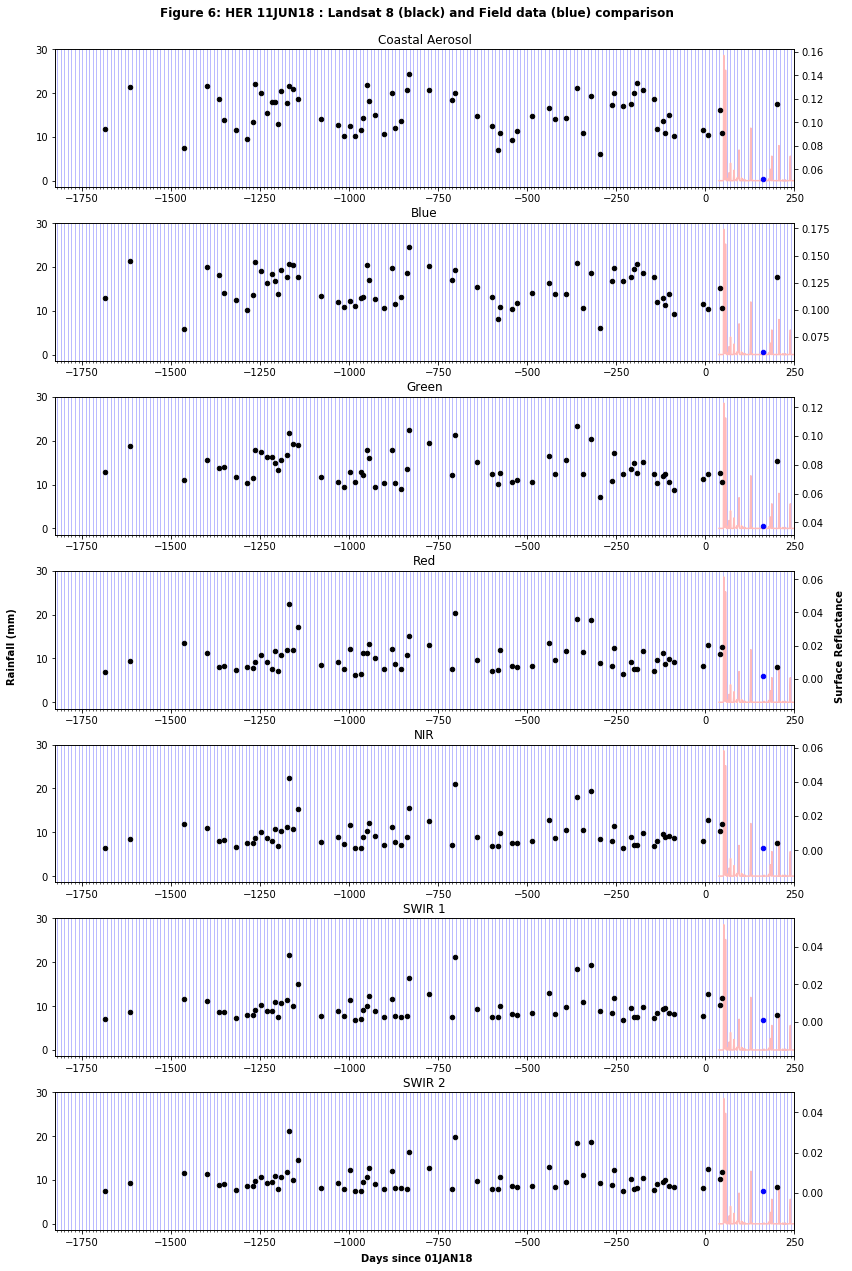

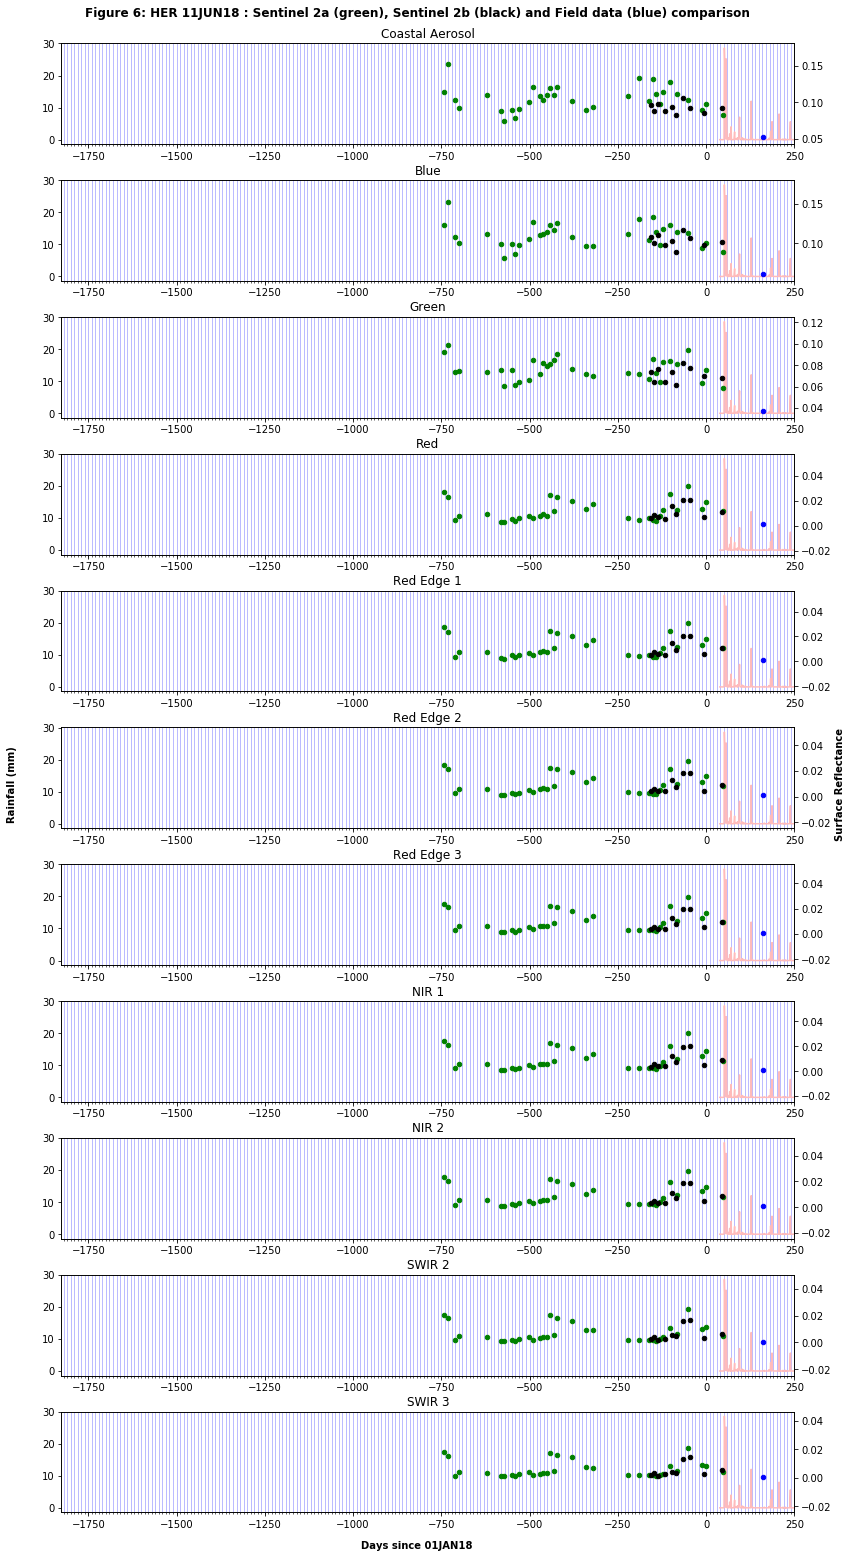

In [41]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [42]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df, rain_dat)

LANDSAT 8: Number of adjacent overpasses: 71
Landsat 8 Surface Reflectance for Band 1 is 0.109+/-0.016 (15.05%)
Landsat 8 Surface Reflectance for Band 2 is 0.122+/-0.016 (13.13%)
Landsat 8 Surface Reflectance for Band 3 is 0.078+/-0.012 (15.62%)
Landsat 8 Surface Reflectance for Band 4 is 0.012+/-0.011 (94.01%)
Landsat 8 Surface Reflectance for Band 5 is 0.008+/-0.011 (130.12%)
Landsat 8 Surface Reflectance for Band 6 is 0.007+/-0.01 (142.98%)
Landsat 8 Surface Reflectance for Band 7 is 0.006+/-0.009 (142.53%)

SENTINEL 2a: Number of adjacent overpasses: 34
Sentinel 2a Surface Reflectance for Band 1 is 0.104+/-0.017 (16.69%)
Sentinel 2a Surface Reflectance for Band 2 is 0.109+/-0.016 (14.91%)
Sentinel 2a Surface Reflectance for Band 3 is 0.075+/-0.011 (15.05%)
Sentinel 2a Surface Reflectance for Band 4 is 0.009+/-0.007 (71.91%)
Sentinel 2a Surface Reflectance for Band 5 is 0.009+/-0.007 (78.77%)
Sentinel 2a Surface Reflectance for Band 6 is 0.007+/-0.007 (94.53%)
Sentinel 2a Surface Re

In [43]:
dd0_ls8.to_csv('../CSV/TimeStats/HER_ls8_drySR.csv')
dd1_ls8.to_csv('../CSV/TimeStats/HER_ls8_dryDiff.csv')
dd0_s2a.to_csv('../CSV/TimeStats/HER_s2a_drySR.csv')
dd1_s2a.to_csv('../CSV/TimeStats/HER_s2a_dryDiff.csv')
dd0_s2b.to_csv('../CSV/TimeStats/HER_s2b_drySR.csv')
dd1_s2b.to_csv('../CSV/TimeStats/HER_s2b_dryDiff.csv')


## How long did this notebook take to run?

In [44]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:27:07 (h:m:s) to run
